# Sentiment Analysis on News Dataset
#### by Andreas Zachariou

<br><br>
In this project, I will perform basic sentiment analysis by using nltk for the sentiment scores and altair library for the visualizations.

In [8]:
#import pandas for data processing
import pandas as pd

#import altair for data visualization
import altair as alt

#import nltk library for assigning scores to each headline
import nltk

alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
#input data
file_path = r'C:/Users/User/Desktop/datasets/topic_labeled_news_dataset/labelled_newscatcher_dataset.csv'
df = pd.read_csv(file_path,delimiter=';')

In [3]:
#first let's have a look at the data
df.head(5)

topic                                               link          domain  \
0  SCIENCE  https://www.eurekalert.org/pub_releases/2020-0...  eurekalert.org   
1  SCIENCE  https://www.pulse.ng/news/world/an-irresistibl...        pulse.ng   
2  SCIENCE  https://www.express.co.uk/news/science/1322607...   express.co.uk   
3  SCIENCE  https://www.ndtv.com/world-news/glaciers-could...        ndtv.com   
4  SCIENCE  https://www.thesun.ie/tech/5742187/perseid-met...       thesun.ie   

        published_date                                              title lang  
0  2020-08-06 13:59:45  A closer look at water-splitting's solar fuel ...   en  
1  2020-08-12 15:14:19  An irresistible scent makes locusts swarm, stu...   en  
2  2020-08-13 21:01:00  Artificial intelligence warning: AI will know ...   en  
3  2020-08-03 22:18:26   Glaciers Could Have Sculpted Mars Valleys: Study   en  
4  2020-08-12 19:54:36  Perseid meteor shower 2020: What time and how ...   en

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108774 entries, 0 to 108773
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   topic           108774 non-null  object
 1   link            108774 non-null  object
 2   domain          108774 non-null  object
 3   published_date  108774 non-null  object
 4   title           108774 non-null  object
 5   lang            108774 non-null  object
dtypes: object(6)
memory usage: 5.0+ MB


In [5]:
#check the topics
sorted(df['topic'].unique())

['BUSINESS',
 'ENTERTAINMENT',
 'HEALTH',
 'NATION',
 'SCIENCE',
 'SPORTS',
 'TECHNOLOGY',
 'WORLD']

In [6]:
#insert two new date columns in my dataframe for later 
df['date'] = pd.to_datetime(df['published_date']).dt.strftime('%Y-%m-%d')
df['month'] = pd.to_datetime(df['published_date']).dt.strftime('%Y-%m')

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = [sia.polarity_scores(line) for line in df.title]
    
scores_df = pd.DataFrame.from_records(results)
df = scores_df.join(df, rsuffix="_right")
df.head()

neg    neu    pos  compound    topic  \
0  0.000  1.000  0.000    0.0000  SCIENCE   
1  0.000  0.745  0.255    0.3400  SCIENCE   
2  0.138  0.517  0.345    0.5574  SCIENCE   
3  0.000  1.000  0.000    0.0000  SCIENCE   
4  0.000  0.755  0.245    0.6369  SCIENCE   

                                                link          domain  \
0  https://www.eurekalert.org/pub_releases/2020-0...  eurekalert.org   
1  https://www.pulse.ng/news/world/an-irresistibl...        pulse.ng   
2  https://www.express.co.uk/news/science/1322607...   express.co.uk   
3  https://www.ndtv.com/world-news/glaciers-could...        ndtv.com   
4  https://www.thesun.ie/tech/5742187/perseid-met...       thesun.ie   

        published_date                                              title  \
0  2020-08-06 13:59:45  A closer look at water-splitting's solar fuel ...   
1  2020-08-12 15:14:19  An irresistible scent makes locusts swarm, stu...   
2  2020-08-13 21:01:00  Artificial intelligence warning: AI will know ...   
3  2020-08-03 22:18:26   Glaciers Could Have Sculpted Mars Valleys: Study   
4  2020-08-12 19:54:36  Perseid meteor shower 2020: What time and how ...   

  lang        date    month  
0   en  2020-08-06  2020-08  
1   en  2020-08-12  2020-08  
2   en  2020-08-13  2020-08  
3   en  2020-08-03  2020-08  
4   en  2020-08-12  2020-08

As you can see four new columns have been added to my dataframe, neg for negative, neu for neutral, pos for positive and compound.<br>
Let's check which are the most negative, neutral and positive headlines.

In [8]:
two_neg = df.nlargest(2, 'neg').title.to_list()
two_neu = df.nlargest(2, 'neu').title.to_list()
two_pos = df.nlargest(2, 'pos').title.to_list()
print(f"The most two negative titles were:\n- {two_neg[0]} \n- {two_neg[1]}")
print(f"\nThe most two neutral titles were:\n- {two_neu[0]} \n- {two_neu[1]}")
print(f"\nThe most two positive titles were:\n- {two_pos[0]} \n- {two_pos[1]}")

The most two negative titles were:
- Shock defeat 
- 3 Killed, 4 Injured In Suicide Bombing

The most two neutral titles were:
- A closer look at water-splitting's solar fuel potential 
- Glaciers Could Have Sculpted Mars Valleys: Study

The most two positive titles were:
- Welcome relief 
- Blessed & Honored: 8/4/2020


Makes sense, words like 'defeat', 'killed' and 'suicide bombing' are far more negative than 'welcome', 'blessed' and 'honored'. <br>

Next, I want to find which are the most trending words in my dataframe, but first I need to check the language of my headlines.

In [9]:
#headlines in English
df[df['lang']=="en"].shape[0]

108774

All of my headlines are in English, let's proceed with the trending words.

In [10]:
from nltk.corpus import stopwords
from collections import Counter

#preprocess the headlines
stopwords = set(stopwords.words('english'))
df['preprocessed_title'] = df['title'].apply(lambda x: nltk.word_tokenize(x.lower()))
df['preprocessed_title'] = df['preprocessed_title'].apply(lambda x: [word for word in x if word.isalpha() and word not in stopwords])

#flatten the preprocessed headlines
all_words = [word for sublist in df['preprocessed_title'] for word in sublist]

#calculate word frequencies
word_counts = Counter(all_words)

#sort words by frequency
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

#find the top 40 trending words
top_trending_words = [word for word, count in sorted_words[:40]]

Top Trending Words - Word Cloud


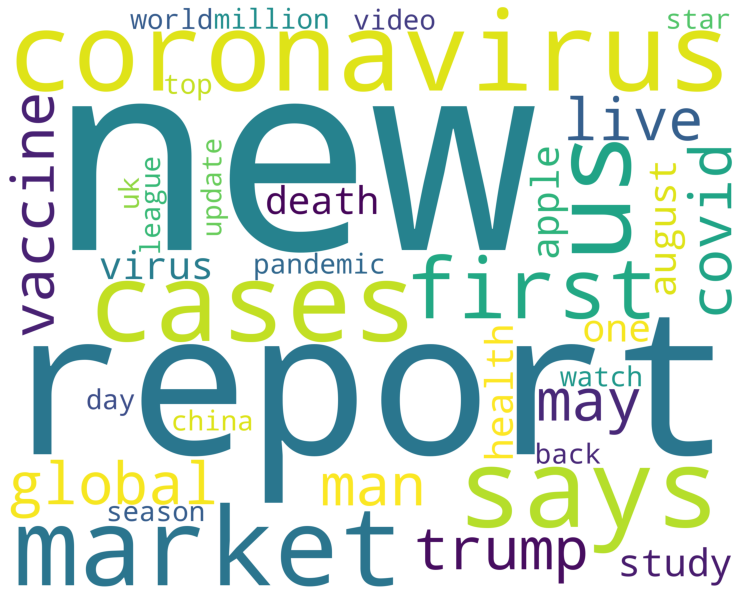

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_draw(data, color='white'):
    cleaned_word = " ".join([word for word in data
                             if 'http' not in word
                             and not word.startswith('@')
                             and not word.startswith('#')
                             and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color=color,
                          width=2500,
                          height=2000
                         ).generate(cleaned_word)
    plt.figure(figsize=(13, 20))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Top Trending Words - Word Cloud")
wordcloud_draw(top_trending_words, 'white')

Now I will jump into the compound scores by creating some visualizations.

In [12]:
#truncate compound scores into 0.1 buckets for creating a histogram
df["compound_trunc"] = df.compound.round(1)
df = df.reset_index()

In [13]:
#create a histogram that visualize the distribution of compound scores
res = (df.groupby(["compound_trunc","topic"])["index"]
        .count()
        .reset_index()
        .rename(columns={"index": "count"})
      )

hist = alt.Chart(res).mark_bar(width=15).encode(
    alt.X("compound_trunc:Q", axis=alt.Axis(title=""),scale=alt.Scale(domain=(-1, 1))),
    y=alt.Y('count:Q', axis=alt.Axis(title="")),
    color=alt.Color('compound_trunc:Q', scale=alt.Scale(scheme='redyellowgreen')),
    tooltip=['compound_trunc', 'count']
).properties(width = 750)
hist

alt.Chart(...)

In [14]:
stacked_bar = alt.Chart(res).mark_bar().encode(
    x = "topic",
    y=alt.Y('count:Q', stack='normalize', axis=alt.Axis(title="", labels=False)),
    color=alt.Color('compound_trunc', scale=alt.Scale(scheme='redyellowgreen')), 
    tooltip=['compound_trunc', 'topic', 'count'],
    order=alt.Order(
      #sort the segments of the bars by this field
      'compound_trunc',
      sort='ascending')
).properties(width = 700)
stacked_bar

alt.Chart(...)

Seems like Nation and World topics have overall more negative topics than the rest while Sports has a more positive content. <br> <br> To get a better view of our data and the sentiment across the headlines I will create a few more visualizations.

In [15]:
#get the articles per month and print
count_per_months = (df.groupby(by=["month"])["index"]
        .count()
        .reset_index()
        .rename(columns={"index": "count"})
      )

print("Count per month:")
for index, row in count_per_months.iterrows():
    print(f"{row['month']}: {row['count']} articles")

Count per month:
2012-09: 3 articles
2015-10: 1 articles
2016-09: 1 articles
2016-12: 2 articles
2017-03: 1 articles
2017-04: 1 articles
2017-06: 4 articles
2017-07: 2 articles
2017-08: 1 articles
2017-10: 4 articles
2017-11: 1 articles
2017-12: 2 articles
2018-04: 2 articles
2018-06: 8 articles
2018-07: 2 articles
2018-08: 4 articles
2018-09: 3 articles
2018-10: 3 articles
2018-11: 2 articles
2018-12: 1 articles
2019-01: 5 articles
2019-02: 2 articles
2019-03: 4 articles
2019-04: 7 articles
2019-05: 5 articles
2019-06: 21 articles
2019-07: 5 articles
2019-08: 1 articles
2019-09: 21 articles
2019-10: 10 articles
2019-11: 18 articles
2019-12: 11 articles
2020-01: 19 articles
2020-02: 13 articles
2020-03: 39 articles
2020-04: 46 articles
2020-05: 49 articles
2020-06: 49 articles
2020-07: 86 articles
2020-08: 108315 articles


In [16]:
#check and visualize the sentiment over months
sentiment_over_months = df.groupby('month')['compound'].mean().reset_index().sort_values('month')

bar = alt.Chart(sentiment_over_months).mark_bar().encode(
    x = "month",
    y=alt.Y('compound:Q', axis=alt.Axis(title="")),
    color=alt.Color('compound', scale=alt.Scale(scheme='redyellowgreen')), 
    tooltip=['month', 'compound'],
    order=alt.Order(
      #sort the segments of the bars by this field
      'compound',
      sort='ascending')
).properties(width = 800)
bar

alt.Chart(...)

We see that most of the months have fluctuation in the mean of the compound value. This is occurred due to the small number of articles per month. As the number of articles increases especially on August 2020, the mean compound is very close to 0 due to the normal distribution. <br> <br> I will slice my dataframe to get only the headlines that were published after 01-01-2020 and continue with my analysis.

In [17]:
#slice dataframe after 01/01/2020
sliced_df = df[df['date'] > '2020-01-01']

In [18]:
#create a scatter plot of 5k random sample for the time period between 01/01/2020 - 18/08/2020
scatter = alt.Chart(sliced_df.sample(n=5000, random_state=1)).mark_point().encode(
    alt.X("date", axis=alt.Axis(title="")),
    y=alt.Y('compound', axis=alt.Axis(title="")),
    color=alt.Color('compound:Q', scale=alt.Scale(scheme='redyellowgreen')), 
    tooltip=['title', 'domain','compound:Q', 'date']
).properties(width = 800,
             height = 500)

scatter

alt.Chart(...)

Based on the scatter plot above, we can observe that the majority of points are in August 2020. The number of points on the positive side appears to be fairly evenly distributed with the ones on the negative side. <br><br> 
In the code below, I will analyze and visualize the data by domain.

In [19]:
#get the 5 largest domains and print
largest_5 = (df.groupby(by=["domain"])["index"]
        .count()
        .reset_index()
        .rename(columns={"index": "count"})
        .nlargest(5, 'count')
      )

print("The top five Domains are: \n")
for index, row in largest_5.iterrows():
    print(f"{row['domain']}: {row['count']} articles")

The top five Domains are: 

dailymail.co.uk: 1855 articles
theguardian.com: 1439 articles
express.co.uk: 1403 articles
timesofindia.indiatimes.com: 1313 articles
globenewswire.com: 1187 articles


In [20]:
#visualize the domains on a line chart
alt.data_transformers.disable_max_rows()
line = alt.Chart(sliced_df[sliced_df.domain.isin(largest_5.domain)]).mark_line(clip=True).encode(
    alt.X("date", axis=alt.Axis(title="Date")),
    y=alt.Y('average(compound)', axis=alt.Axis(title=""), scale=alt.Scale(domain=(-0.8, 0.8))),
    color=alt.Color('domain').title("Domain by colour").scale(scheme='dark2'), 
    tooltip=['domain','average(compound):Q', 'date']
).properties(
    width=700,
    height=500
)

line

alt.Chart(...)

Looking at the domains chart it seems that express.co.uk is more negative and globenewswire.com more positive during August 2020.